In [1]:
# Install the necessary packages if not already installed
#pip install s3fs
#pip install nltk
#pip install wordcloud
#pip install seaborn

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load S3 Bucket into Pandas DataFrame

In [2]:
# Read in the data from S3 to dataframe
biden_df = pd.read_csv('s3://bidentweetscsv/hashtag_joebiden.csv')
biden_df.head()

/var/folders/wg/g2wgk99x2l76360wx5d0fqb80000gn/T/ipykernel_23595/3097696073.py:2: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  biden_df = pd.read_csv('Resources/hashtag_joebiden.csv')


,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


# Clean DataFrame

In [3]:
# Remove unnecessary columns
biden_df = biden_df.drop(columns=['tweet_id', 'source', 'user_id', 'user_name', 'user_screen_name', 'user_description', 'user_join_date', 'user_location', 'city', 'continent', 'state_code', 'collected_at'])

# Display Dataframe
biden_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,lat,long,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.77427,-80.19366,United States of America,Florida
1,2020-10-15 00:00:18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,6628.0,NaN,NaN,NaN,NaN
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,1536.0,46.304036,-109.171431,United States of America,Montana
3,2020-10-15 00:00:21,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,27.0,NaN,NaN,NaN,NaN
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,390.0,36.701463,-118.755997,United States of America,California


In [4]:
# Drop rows that are not from the United States of America
biden_df = biden_df[biden_df['country'] == 'United States of America']

# Display Dataframe
biden_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,lat,long,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.77427,-80.19366,United States of America,Florida
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,1536.0,46.304036,-109.171431,United States of America,Montana
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,390.0,36.701463,-118.755997,United States of America,California
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,1397.0,41.875562,-87.624421,United States of America,Illinois
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,266.0,37.572603,-85.155141,United States of America,Kentucky


In [5]:
# Drop rows with NaN values
biden_df = biden_df.dropna()

# Display Dataframe
biden_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,lat,long,country,state
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.77427,-80.19366,United States of America,Florida
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,1536.0,46.304036,-109.171431,United States of America,Montana
4,2020-10-15 00:00:22,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,390.0,36.701463,-118.755997,United States of America,California
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,1397.0,41.875562,-87.624421,United States of America,Illinois
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,266.0,37.572603,-85.155141,United States of America,Kentucky


In [6]:
# Get info on the dataframe
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153579 entries, 0 to 1059895
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            153579 non-null  object 
 1   tweet                 153579 non-null  object 
 2   likes                 153579 non-null  object 
 3   retweet_count         153579 non-null  float64
 4   user_followers_count  153579 non-null  object 
 5   lat                   153579 non-null  object 
 6   long                  153579 non-null  object 
 7   country               153579 non-null  object 
 8   state                 153579 non-null  object 
dtypes: float64(1), object(8)
memory usage: 11.7+ MB


In [7]:
# Convert 'likes', 'user_followers_count' 'lat' and 'long' to numeric
biden_df['likes'] = pd.to_numeric(biden_df['likes'], errors='coerce')
biden_df['user_followers_count'] = pd.to_numeric(biden_df['user_followers_count'], errors='coerce')
biden_df['lat'] = pd.to_numeric(biden_df['lat'], errors='coerce')
biden_df['long'] = pd.to_numeric(biden_df['long'], errors='coerce')

# Convert 'created_at' to datetime
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'], errors='coerce')

In [8]:
# Confirm changes
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153579 entries, 0 to 1059895
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            153579 non-null  datetime64[ns]
 1   tweet                 153579 non-null  object        
 2   likes                 153579 non-null  float64       
 3   retweet_count         153579 non-null  float64       
 4   user_followers_count  153579 non-null  float64       
 5   lat                   153579 non-null  float64       
 6   long                  153579 non-null  float64       
 7   country               153579 non-null  object        
 8   state                 153579 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 11.7+ MB


# Clean Tweets

In [9]:
# Text cleaning
import re

def clean_tweet_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)     # Remove mentions
    text = re.sub(r'#\S+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-z\s]', '', text) # Remove non-alphabetic characters
    return text

biden_df['cleaned_tweet'] = biden_df['tweet'].apply(clean_tweet_text)


In [10]:
# Remove rows where 'tweet' is an empty string
biden_df = biden_df[biden_df['cleaned_tweet'].astype(str).str.strip() != '']

In [11]:
# Display Dataframe
biden_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,lat,long,country,state,cleaned_tweet
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.774270,-80.193660,United States of America,Florida,en dice que solo se preocupa por l mismo ...
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,1536.0,46.304036,-109.171431,United States of America,Montana,this is how made his \n
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,1397.0,41.875562,-87.624421,United States of America,Illinois,in is being by twitter to manipulate a us ...
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,266.0,37.572603,-85.155141,United States of America,Kentucky,fbi allegedly obtained hunter biden computer d...
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,83.0,27.947760,-82.458444,United States of America,Florida,comments on this do democrats understand how r...


In [12]:
# Import the NLTK library and download the VADER lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/keyanapregent/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Import the SentimentIntensityAnalyzer class from the NLTK library
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to DataFrame
biden_df['sentiment'] = biden_df['cleaned_tweet'].apply(get_vader_sentiment)

In [14]:
# Display Dataframe
biden_df.head()

,created_at,tweet,likes,retweet_count,user_followers_count,lat,long,country,state,cleaned_tweet,sentiment
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,1860.0,25.774270,-80.193660,United States of America,Florida,en dice que solo se preocupa por l mismo ...,neutral
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,1536.0,46.304036,-109.171431,United States of America,Montana,this is how made his \n,neutral
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,1397.0,41.875562,-87.624421,United States of America,Illinois,in is being by twitter to manipulate a us ...,negative
11,2020-10-15 00:00:57,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,266.0,37.572603,-85.155141,United States of America,Kentucky,fbi allegedly obtained hunter biden computer d...,neutral
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,83.0,27.947760,-82.458444,United States of America,Florida,comments on this do democrats understand how r...,neutral


In [15]:
# Save the cleaned data to a new CSV file
biden_df.to_csv('Resources/hashtag_joebiden_cleaned.csv', index=False)

# Correlation

In [16]:
# Assign numerical values to sentiments (e.g., positive: 1, neutral: 0, negative: -1)
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
biden_df['sentiment_numeric'] = biden_df['sentiment'].map(sentiment_mapping)

In [17]:
# Selecting relevant columns for correlation
columns_for_correlation = ['likes', 'retweet_count', 'user_followers_count', 'sentiment_numeric']
correlation_matrix = biden_df[columns_for_correlation].corr()

# Display the correlation matrix
print(correlation_matrix)

                         likes  retweet_count  user_followers_count  \
likes                 1.000000       0.890608              0.187532   
retweet_count         0.890608       1.000000              0.223639   
user_followers_count  0.187532       0.223639              1.000000   
sentiment_numeric     0.001714      -0.001956             -0.009985   

                      sentiment_numeric  
likes                          0.001714  
retweet_count                 -0.001956  
user_followers_count          -0.009985  
sentiment_numeric              1.000000  


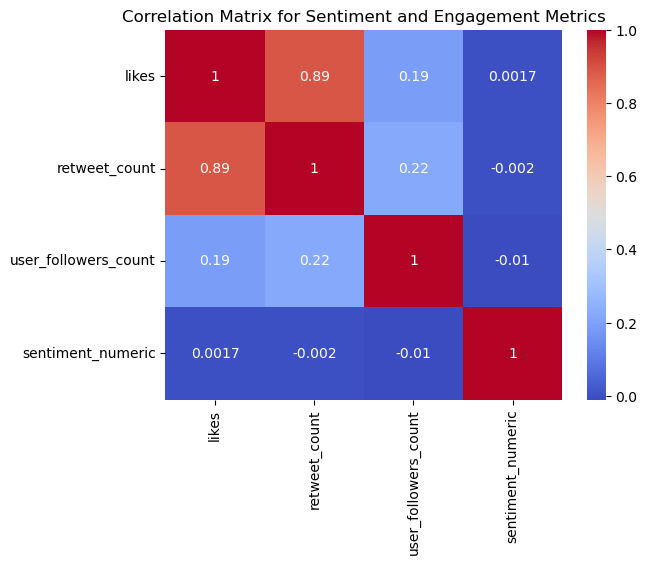

In [18]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Sentiment and Engagement Metrics')
plt.show()

# Regression Analysis

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparing data for regression analysis
X = biden_df[['likes', 'retweet_count', 'user_followers_count']]
y = biden_df['sentiment_numeric']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)

/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared Score: {R2}")

Mean Absolute Error: 0.7278958743180433
Mean Squared Error: 0.6833016171928028
R-squared Score: 6.813025290797192e-05


/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/keyanapregent/anaconda3/envs/dev/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

# Visualizations

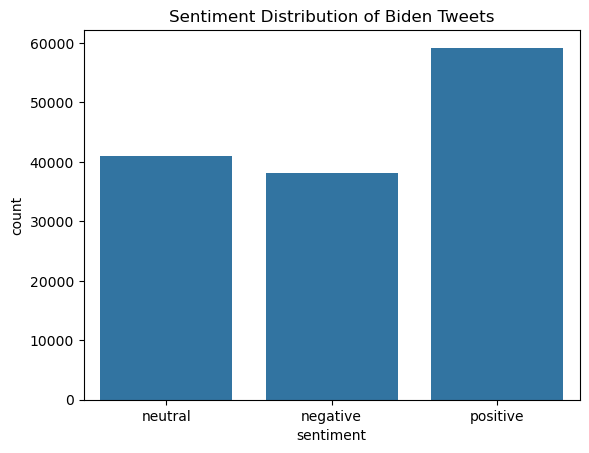

In [21]:
# Visualization of sentiment distribution
sns.countplot(x='sentiment', data=biden_df)
plt.title('Sentiment Distribution of Biden Tweets')
plt.show()

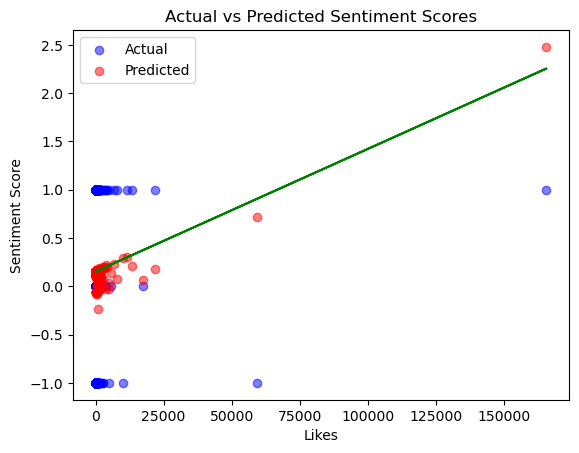

In [22]:
# Scatter plot of actual vs predicted values
plt.scatter(X_test['likes'], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test['likes'], y_pred, color='red', label='Predicted', alpha=0.5)

# Line of best fit
m, b = np.polyfit(X_test['likes'], y_pred, 1)
plt.plot(X_test['likes'], m*X_test['likes'] + b, color='green')

plt.xlabel('Likes')
plt.ylabel('Sentiment Score')
plt.title('Actual vs Predicted Sentiment Scores')
plt.legend()
plt.show()

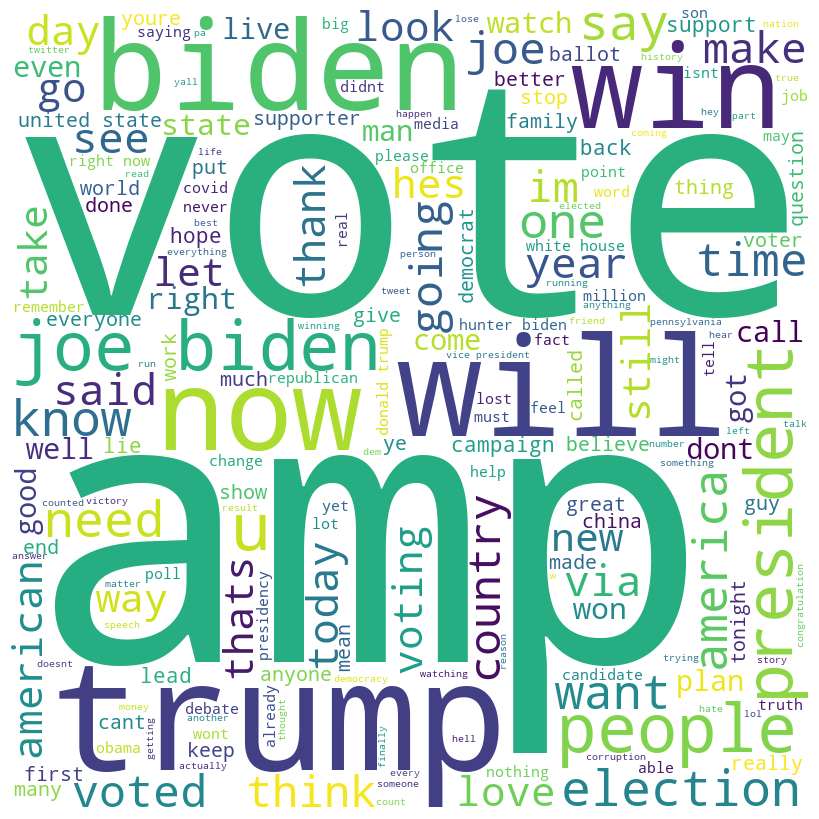

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets into a single string
text = ' '.join(biden_df['cleaned_tweet'])  # Assuming 'cleaned_tweet' is your column name
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(text)

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()